In [ ]:
%%capture
!pip install -U seaborn

In [1]:
import os
import pandas as pd
import pickle
from nltk import tokenize
import string
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
file = open("stories_concat.pkl",'rb')
stories = pickle.load(file)

### Split into Sentences, Summaries

In [3]:
df = pd.DataFrame.from_dict(stories, orient = 'index', columns = ['text'])
df['sentences'] = df.text.apply(lambda row: tokenize.sent_tokenize(row))
# concat 3 'highlights' at end of each article into a summary 
df['summary'] = df.sentences.str[-1].str.replace('@highlight', '').str.replace('    ', '. ').str.strip()
df['sentences_summary'] = df.summary.apply(lambda row: tokenize.sent_tokenize(row))

In [60]:
def extract_words(df, source_var, word_var):
    df[word_var] = df[source_var].str.lower()
    df[word_var] = df[word_var].apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))
    df[word_var] = df[word_var].str.split(' ')
    
    return df

# get words without punctuation, downcased
df = extract_words(df, 'text', 'words')
df = extract_words(df, 'summary', 'words_summary')

In [7]:
# save
with open ('stories_df.pkl', 'wb') as f:
    pickle.dump(df, f)

In [4]:
file = open("stories_df.pkl",'rb')
df = pickle.load(file)

### Distribution of Number of Sentences, Words

In [19]:
df['num_sentences'] = df.sentences.apply(lambda row: len(row))
df['num_words'] = df.words.apply(lambda row: len(row))

df['num_sentences_summary'] = df.sentences_summary.apply(lambda row: len(row))
df['num_words_summary'] = df.words_summary.apply(lambda row: len(row))

__Text__

[Text(0.5, 0, 'Number of Sentences'), Text(0.5, 1.0, 'Article Distributions')]

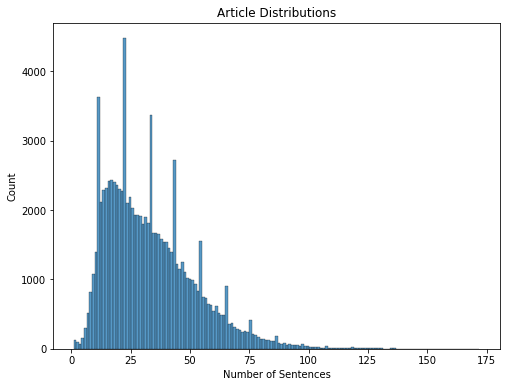

In [34]:
plt.subplots(figsize = (8,6))
ax = sns.histplot(data = df, x = 'num_sentences')
ax.set(xlabel ='Number of Sentences', title = 'Article Distributions')

[Text(0.5, 0, 'Number of Words'), Text(0.5, 1.0, 'Article Distributions')]

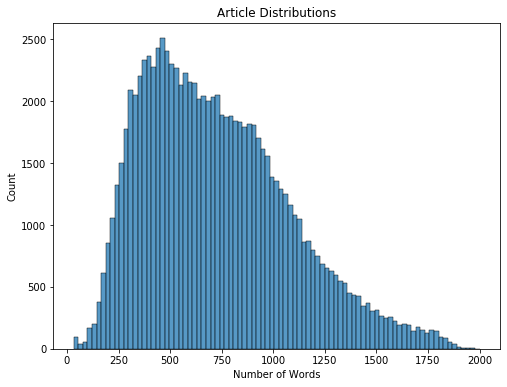

In [33]:
plt.subplots(figsize = (8,6))
ax = sns.histplot(data = df, x = 'num_words')
ax.set(xlabel ='Number of Words', title = 'Article Distributions')

__Summary__

[Text(0.5, 0, 'Number of Words'), Text(0.5, 1.0, 'Summary Distributions')]

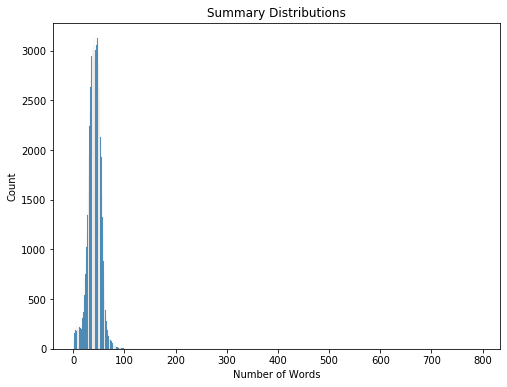

In [35]:
plt.subplots(figsize = (8,6))
ax = sns.histplot(data = df, x = 'num_words_summary')
ax.set(xlabel ='Number of Words', title = 'Summary Distributions')

D:\programs\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Number of Sentences'), Text(0.5, 1.0, 'Summary Distributions')]

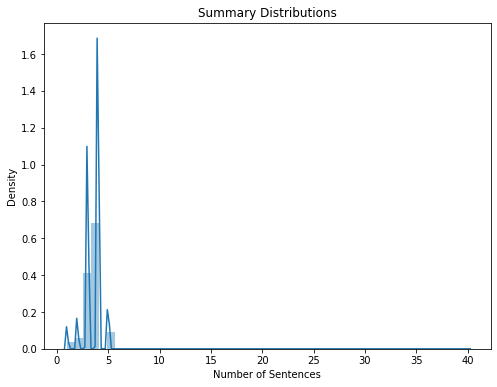

In [36]:
plt.subplots(figsize = (8,6))
ax = sns.distplot(df.num_sentences_summary)
ax.set(xlabel ='Number of Sentences', title = 'Summary Distributions')

### Correlation: Number Sentences/Words in Article vs Summary

In [39]:
df[['num_sentences', 'num_sentences_summary']].corr()

,num_sentences,num_sentences_summary
num_sentences,1.000000,0.066789
num_sentences_summary,0.066789,1.000000


In [40]:
df[['num_words', 'num_words_summary']].corr()

,num_words,num_words_summary
num_words,1.000000,0.159797
num_words_summary,0.159797,1.000000


### Words in Summary that don't appear in original text

In [64]:
def set_diff_words(row):
    return set(row.words_summary).difference(set(row.words))

df['new_summary_words'] = df.apply(lambda row: set_diff_words(row), axis = 1)

In [73]:
df['l'] = df.new_summary_words.apply(lambda row: len(row))
df[df.l >0][['sentences',
    'summary','words_summary']].values

array([[list(['When Harry returned home the morning after the typhoon struck, he found part of the roof missing from his home.', 'It wasn\'t as bad as Yolanda," he said, referring to Typhoon Haiyan, which completely destroyed his house in the Magallanes "barangay," or district, of Tacloban a year ago.', '"It was so scary."', "Much of his barangay, which lies close to the water's edge, was decimated by the storm surge that was generated by the most powerful storm ever to make landfall in November, 2013.", 'It is also one of the poorest areas in Tacloban.', 'Little more than a year on and most people in this traumatized town in the central Philippines will be incredibly relieved that Typhoon Hagupit, which passed some 50 kilometers north, came with nothing like the force of Haiyan.', 'Most of what has been rebuilt in the past few months has largely remained intact.', 'Harry was one of many who heeded official warnings to evacuate to safer areas during the storm -- he was not going to rep